In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.kernel_ridge import KernelRidge
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Read data & split by year
def split_train_test(file_path, start_year, mid_year, final_year):
  full_dataset = pd.read_excel(file_path)
  training_ori = full_dataset[full_dataset['Date - 0'].dt.year.isin(np.arange(start_year, mid_year))]
  testing_ori = full_dataset[full_dataset['Date - 0'].dt.year.isin(np.arange(mid_year, final_year))]
  return training_ori, testing_ori

ONE day ahead

(change the file path)

In [ ]:
training_ori, testing_ori = split_train_test('/content/drive/MyDrive/EC503/KRR/amazon_3_1.xlsx',
                        2010, 2019, 2022)

# WindowSize = 3, Horizon = 1, factor = all
X_train_1a = training_ori.loc[:, 'Open - 2':'Close - 0']
X_test_1a = testing_ori.loc[:, 'Open - 2':'Close - 0']

# WindowSize = 3, Horizon = 1, factor = close
X_train_1c = X_train_1a.loc[:, 'Close - 2':'Close - 0']
X_test_1c = X_test_1a.loc[:, 'Close - 2':'Close - 0']

Y_train_1 = training_ori.iloc[:, -1]
Y_test_1 = testing_ori.iloc[:, -1]

FIVE days ahead

(change the file path)

In [ ]:
training_ori, testing_ori = split_train_test('/content/drive/MyDrive/EC503/KRR/amazon_8_5.xlsx',
                        2010, 2019, 2022)

# WindowSize = 8, Horizon = 5, factor = all
X_train_5a = training_ori.loc[:, 'Open - 7':'Close - 0']
X_test_5a = testing_ori.loc[:, 'Open - 7':'Close - 0']

# WindowSize = 8, Horizon = 5, factor = close
X_train_5c = X_train_5a.loc[:, 'Close - 7':'Close - 0']
X_test_5c = X_test_5a.loc[:, 'Close - 7':'Close - 0']

Y_train_5 = training_ori.iloc[:, -1]
Y_test_5 = testing_ori.iloc[:, -1]

TWENTY-TWO days ahead

(change the file path)

In [ ]:
training_ori, testing_ori = split_train_test('/content/drive/MyDrive/EC503/KRR/amazon_25_22.xlsx',
                        2010, 2019, 2022)

# WindowSize = 25, Horizon = 22, factor = all
X_train_22a = training_ori.loc[:, 'Open - 24':'Close - 0']
X_test_22a = testing_ori.loc[:, 'Open - 24':'Close - 0']

# WindowSize = 25, Horizon = 22, factor = close
X_train_22c = X_train_22a.loc[:, 'Close - 24':'Close - 0']
X_test_22c = X_test_22a.loc[:, 'Close - 24':'Close - 0']

Y_train_22 = training_ori.iloc[:, -1]
Y_test_22 = testing_ori.iloc[:, -1]

In [ ]:
# X_train = [X_train_1a, X_train_1c, X_train_5a, X_train_5c, X_train_22a, X_train_22c]
# X_test = [X_test_1a, X_test_1c, X_test_5a, X_test_5c, X_test_22a, X_test_22c]
# Y_train = [Y_train_1, Y_train_5, Y_train_22]
# Y_test = [Y_test_1, Y_test_5, Y_test_22]

In [ ]:
x_train = np.array(X_train_22c)
y_train = np.array(Y_train_22).reshape(-1,1)
x_test = np.array(X_test_22c)
y_test = np.array(Y_test_22).reshape(-1,1)

Kernel Ridge Regression


*   1 day α = 1e-4, γ = 1e-10, mape = 0.009880158988808058
*   5 day α = 1e-2, γ = 5e-11, mape = 0.03718623599754955
*   22day α = 0.05, γ = 4e-11, mape = 0.0661722105583382



training mape:  0.09570656804336317
test mape:  0.07272415022579178


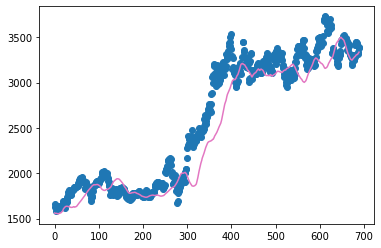

In [ ]:
krr = KernelRidge(alpha = 0.05, kernel = 'rbf', gamma = 4e-11)
krr.fit(x_train,y_train)
y_predict = krr.predict(x_train)
rmse = math.sqrt(mean_squared_error(y_predict, y_train))
mape = mean_absolute_percentage_error(y_predict, y_train)
print('training mape: ',mape)
X_grid = np.arange(y_train.size)
# fig = plt.figure()
# plt.plot(X_grid,y_predict,color='C6',linestyle='solid')
# plt.scatter(X_grid,y_train,color='C0')
test_predict = krr.predict(x_test)
test_mape = mean_absolute_percentage_error(test_predict, y_test)
print('test mape: ',test_mape)
test_grid = np.arange(y_test.size)
fig = plt.figure()
plt.plot(test_grid,test_predict,color='C6',linestyle='solid')
plt.scatter(test_grid,y_test,color='C0')